In [2]:
#imports all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [4]:
#loads data into a Panda DataFrame
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
#gives us additional information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#gives us statistical information about the data
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
#replaces 0 values with NaN
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy['Glucose'] = diabetes_df_copy['Glucose'].replace(0,np.NaN)
diabetes_df_copy['BloodPressure'] = diabetes_df_copy['BloodPressure'].replace(0,np.NaN)
diabetes_df_copy['SkinThickness'] = diabetes_df_copy['SkinThickness'].replace(0,np.NaN)
diabetes_df_copy['Insulin'] = diabetes_df_copy['Insulin'].replace(0,np.NaN)
diabetes_df_copy['BMI'] = diabetes_df_copy['BMI'].replace(0,np.NaN)

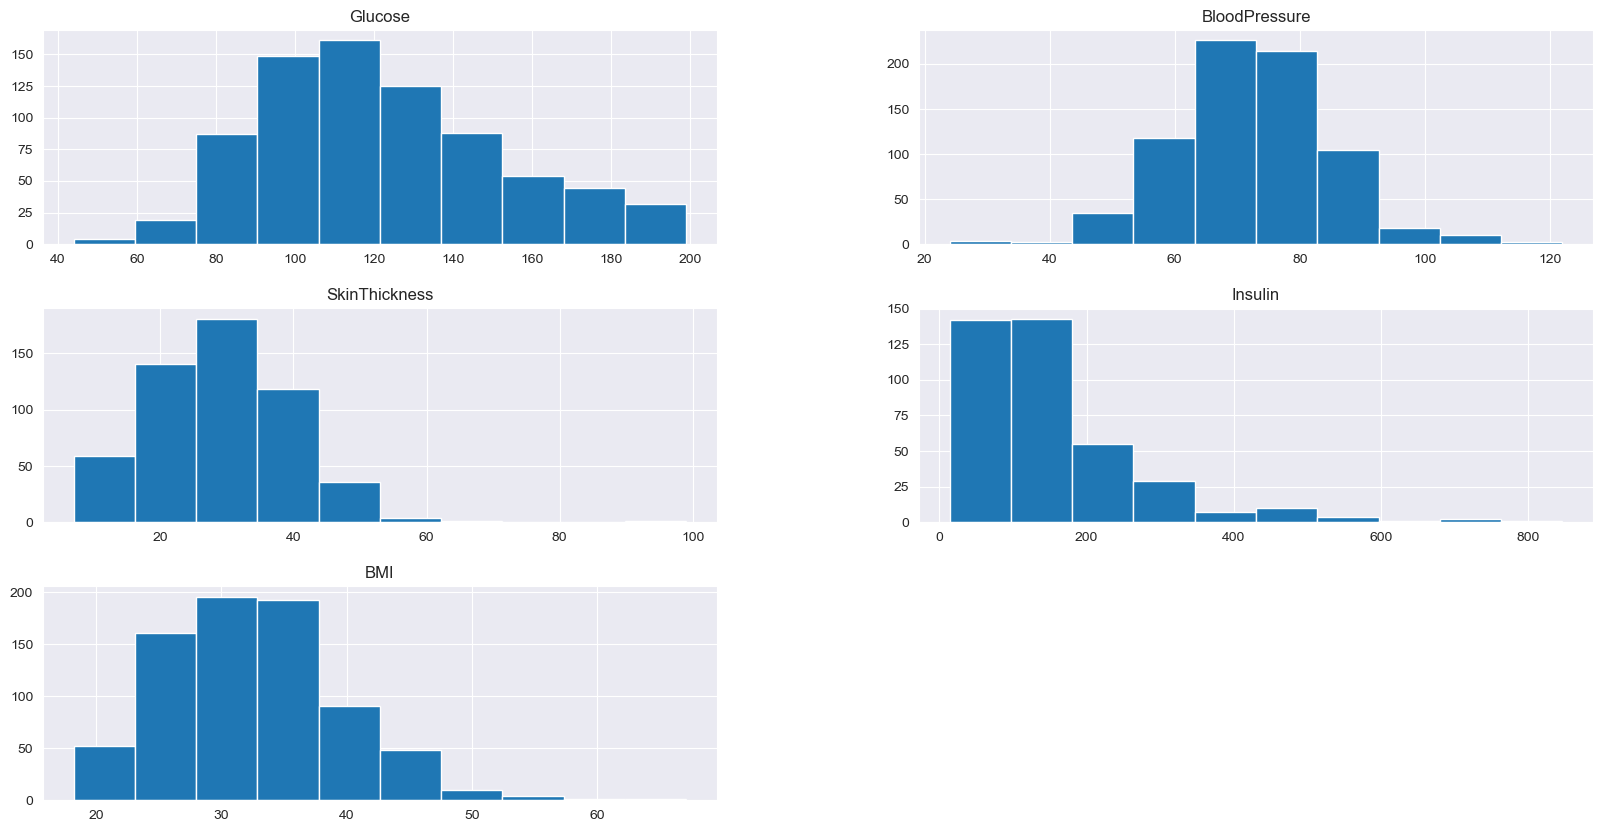

In [8]:
#creates a histogram for each column in the dataset
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].hist(figsize = (20,10))
plt.show()

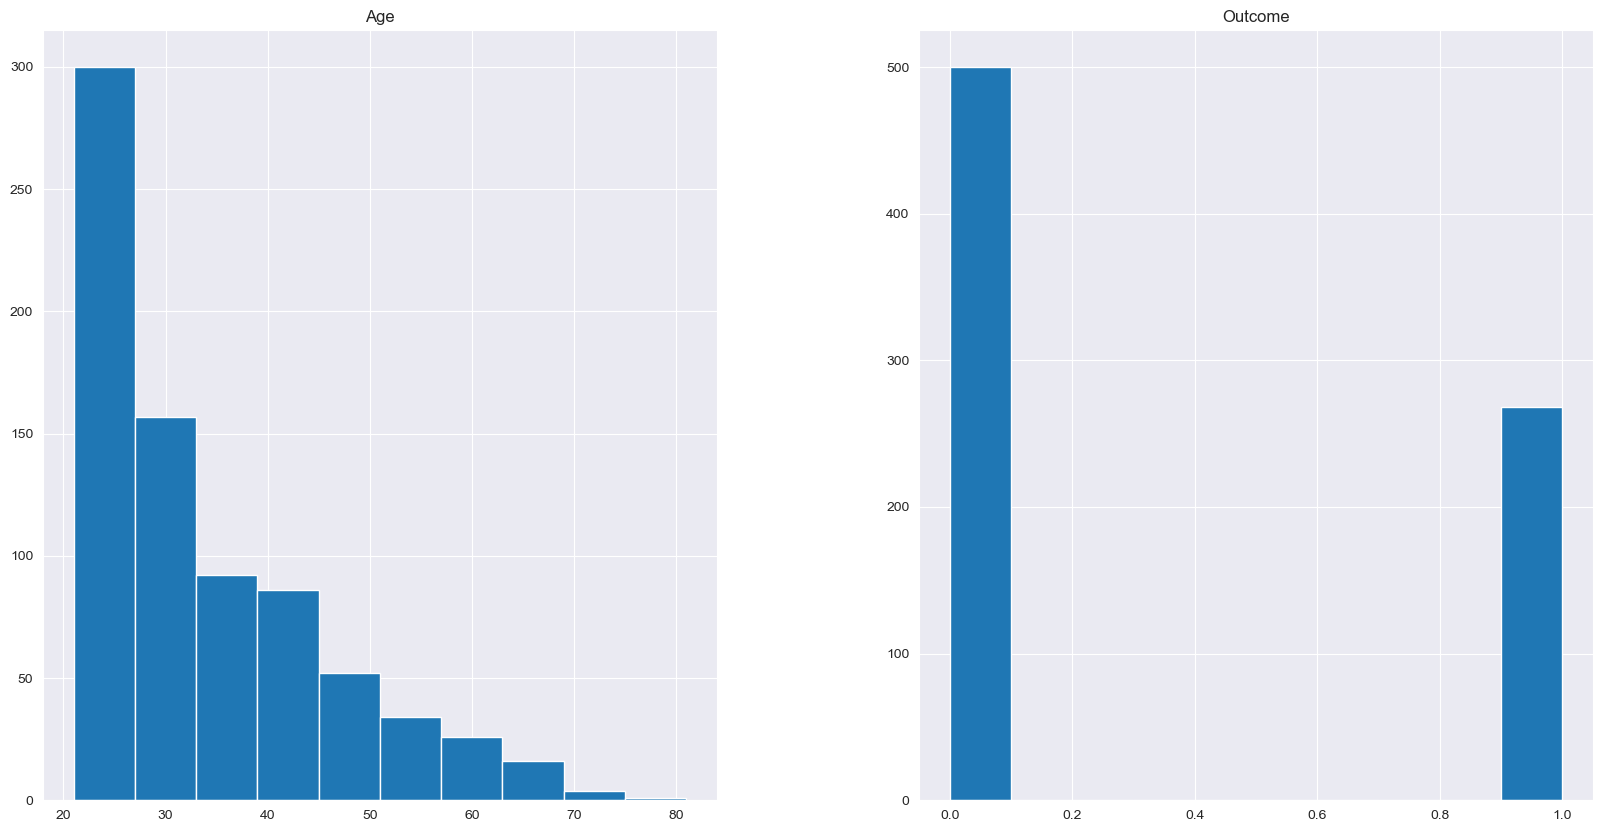

In [9]:
#creates a histogram for each column in the dataset
diabetes_df_copy[['Age','Outcome']].hist(figsize = (20,10))
plt.show()

In [10]:
#we replace skin thickness, insulin, and bmi with the median instead of the mean since their data looks skewed and
#outlier is more likely to affect the mean making it less representative for most of the dataset
#for glucose and bloodpressure using the mean should be fine 
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

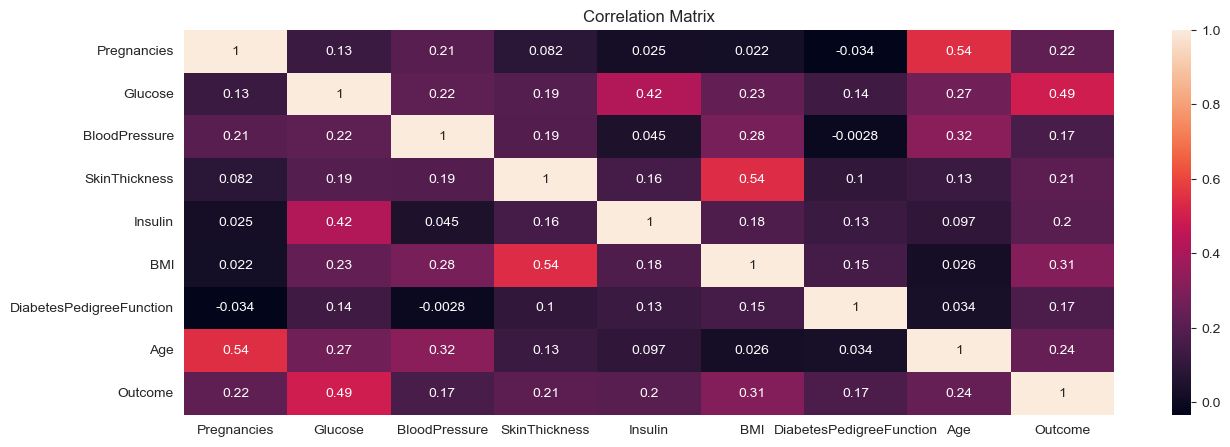

In [11]:
#creates a heatmap showing the correlation between all variables
sns.heatmap(diabetes_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

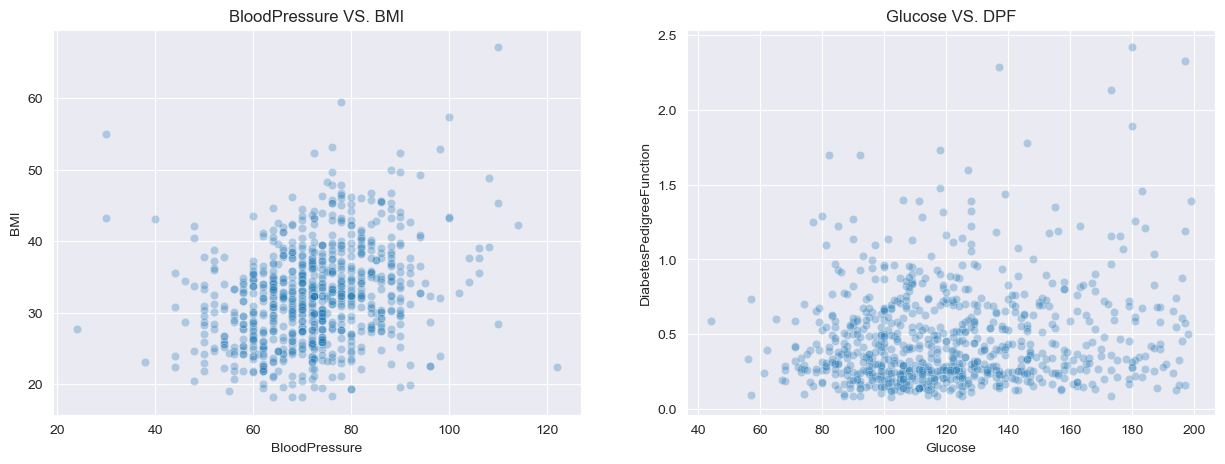

In [12]:
#creates a scatter for relationship between two variable
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='BloodPressure', y='BMI', data=diabetes_df_copy, alpha=0.3, ax=axes[0])
axes[0].set_title('BloodPressure VS. BMI')

sns.scatterplot(x='Glucose', y='DiabetesPedigreeFunction', data=diabetes_df_copy, alpha=0.3, ax=axes[1])
axes[1].set_title('Glucose VS. DPF')

plt.show()

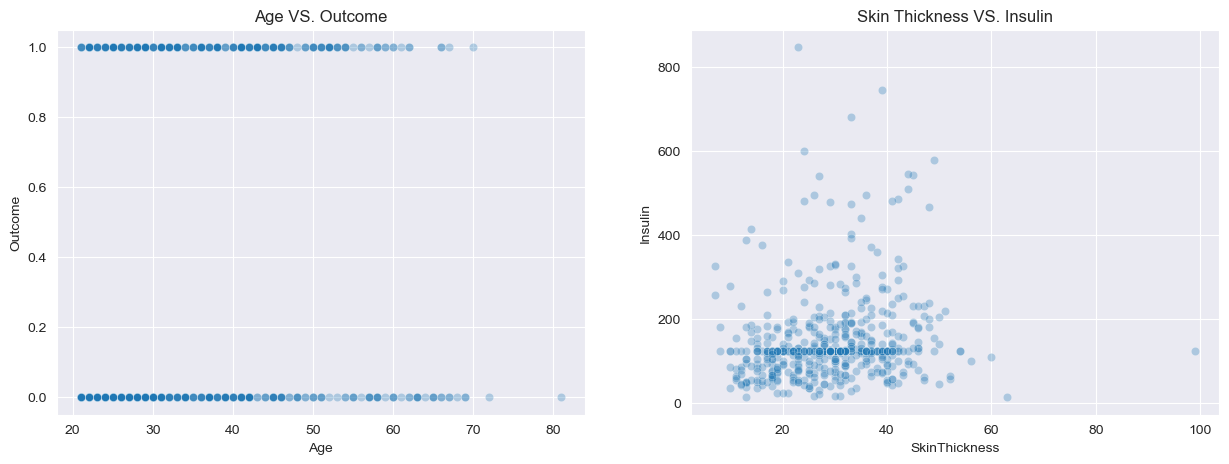

In [13]:
#creates a scatter for relationship between two variable for Age vs Outcome and Skin Thickness vs Insulin
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='Age', y='Outcome', data=diabetes_df_copy, alpha=0.3, ax=axes[0])
axes[0].set_title('Age VS. Outcome')

sns.scatterplot(x='SkinThickness', y='Insulin', data=diabetes_df_copy, alpha=0.3, ax=axes[1])
axes[1].set_title('Skin Thickness VS. Insulin')

plt.show()

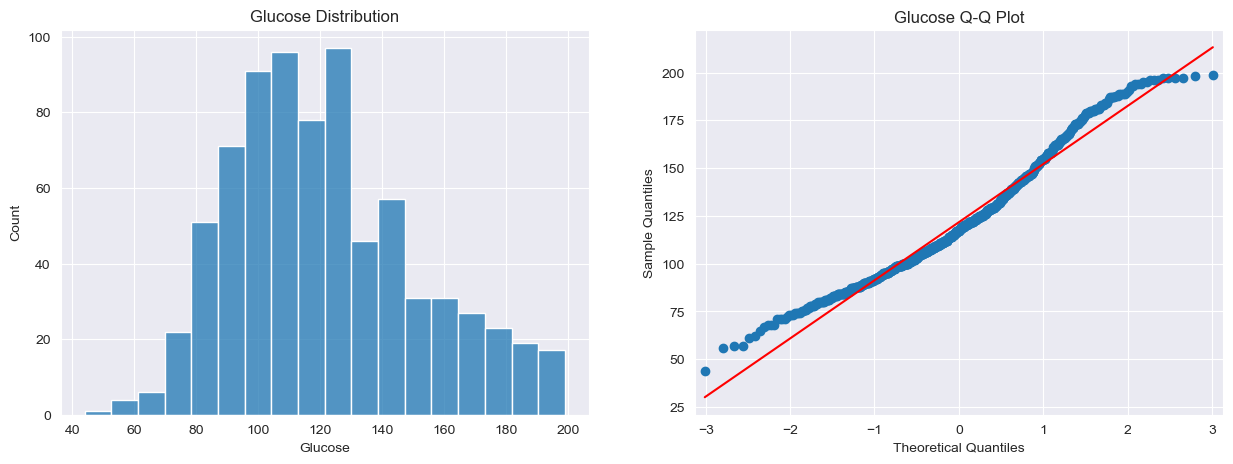

Shapiro-Wilk: 
w:0.9699020385742188, p-value:1.7770054525079182e-11

Kolmogorov-Smirnov: 
d:0.9699020385742188, p-value:0.0

Skewness of the data: 
0.531677628850459



In [14]:
#performs Q-Q plot, Shapiro-Wilk, and Kolmogorov-Smirnov tests, the P-value seems to reject the null hypothesesis
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['Glucose'], ax=axes[0])
axes[0].set_title('Glucose Distribution')

sm.qqplot(diabetes_df_copy['Glucose'], line='s', ax=axes[1])
axes[1].set_title('Glucose Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Glucose'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Glucose'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Glucose'])))

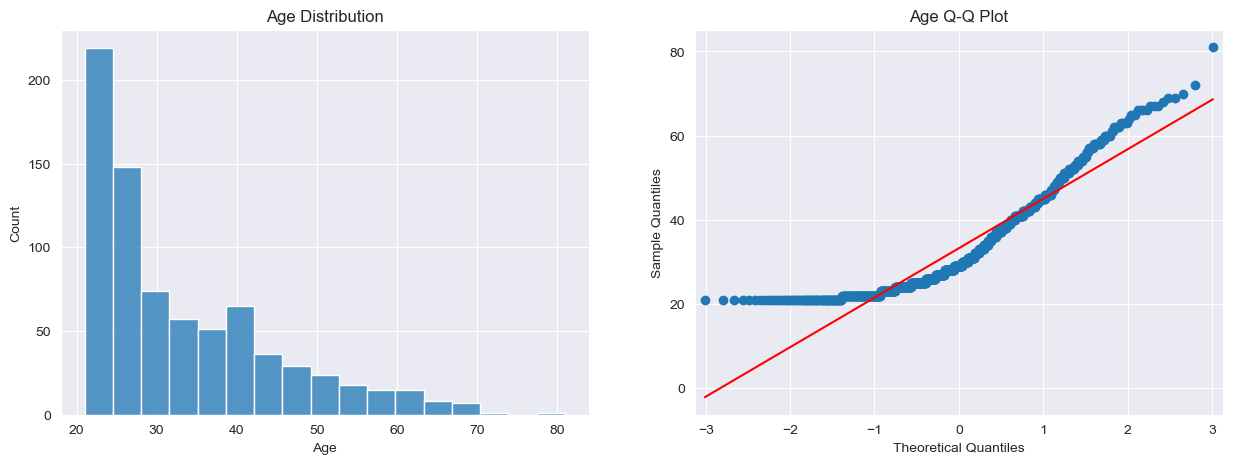

Shapiro-Wilk: 
w:0.874765932559967, p-value:2.401829612553989e-24

Kolmogorov-Smirnov: 
d:0.874765932559967, p-value:0.0

Skewness of the data: 
1.127389259531697



In [15]:
#performs Q-Q plot, Shapiro-Wilk, and Kolmogorov-Smirnov tests, the P-value seems to reject the null hypothesesis
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(diabetes_df_copy['Age'], ax=axes[0])
axes[0].set_title('Age Distribution')

sm.qqplot(diabetes_df_copy['Age'], line='s', ax=axes[1])
axes[1].set_title('Age Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_df_copy['Age'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(diabetes_df_copy['Age'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(diabetes_df_copy['Age'])))

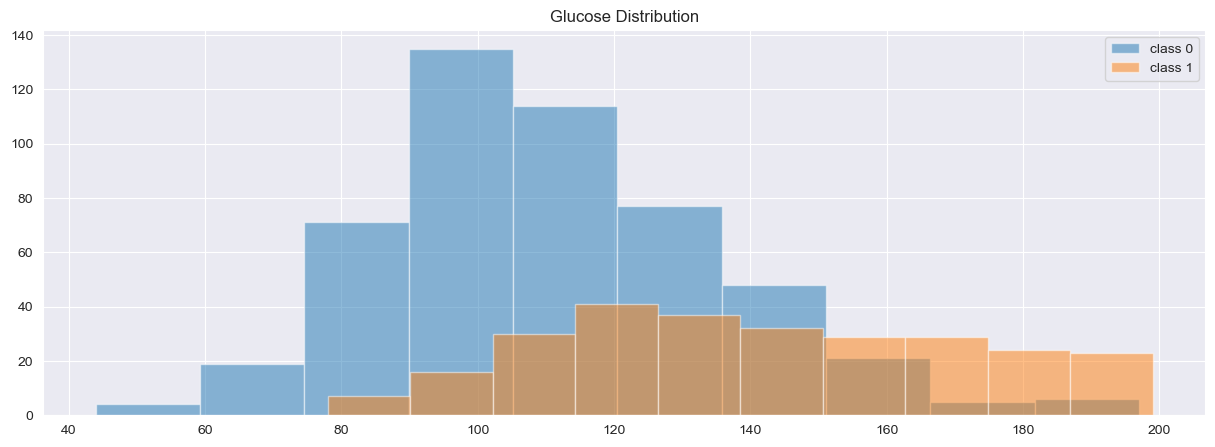

In [16]:
#compares the glucose distribution between two classes
class_zero = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 0)]
class_one = diabetes_df_copy[(diabetes_df_copy['Outcome'] == 1)]

plt.hist(x=class_zero['Glucose'], label='class 0', alpha=0.5)
plt.hist(x=class_one['Glucose'], label='class 1', alpha=0.5)
plt.legend()
plt.title('Glucose Distribution')

plt.show()

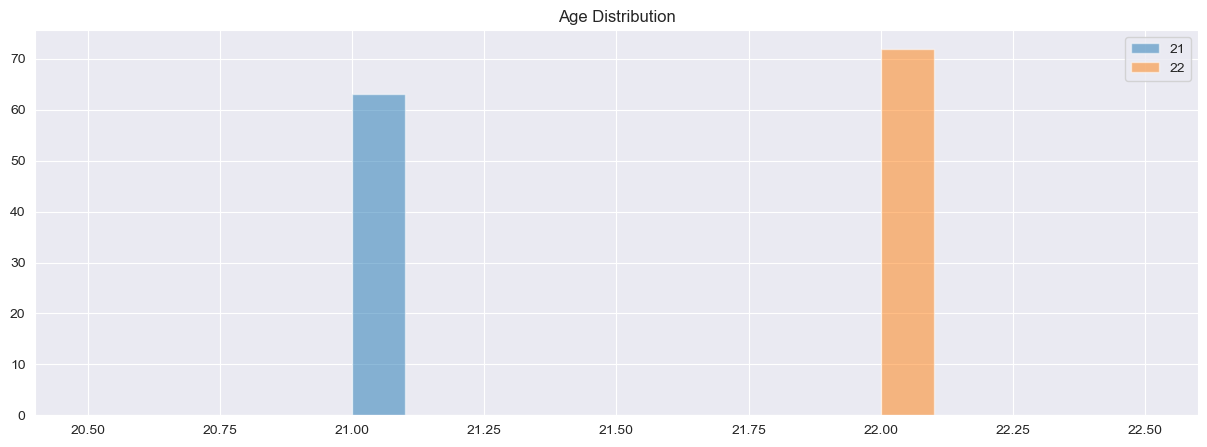

In [17]:
#compares the glucose distribution between two classes
class_zero = diabetes_df_copy[(diabetes_df_copy['Age'] == 21)]
class_one = diabetes_df_copy[(diabetes_df_copy['Age'] == 22)]

plt.hist(x=class_zero['Age'], label='21', alpha=0.5)
plt.hist(x=class_one['Age'], label='22', alpha=0.5)
plt.legend()
plt.title('Age Distribution')

plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# all columns except 'Outcome'
X = diabetes_df_copy.drop('Outcome', axis=1)
y = diabetes_df_copy['Outcome']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [19]:
from sklearn.preprocessing import StandardScaler

# all columns except 'Age'
X = diabetes_df_copy.drop('Age', axis=1)
y = diabetes_df_copy['Age']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [20]:
X.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction   Outcome  
0                  0.468492  1.365896  
1                 -0.365061 -0.732120  
2                  0.604397  1.365896  
3                 -0.920763 -0.732120  
4                  5.484909  1.365896

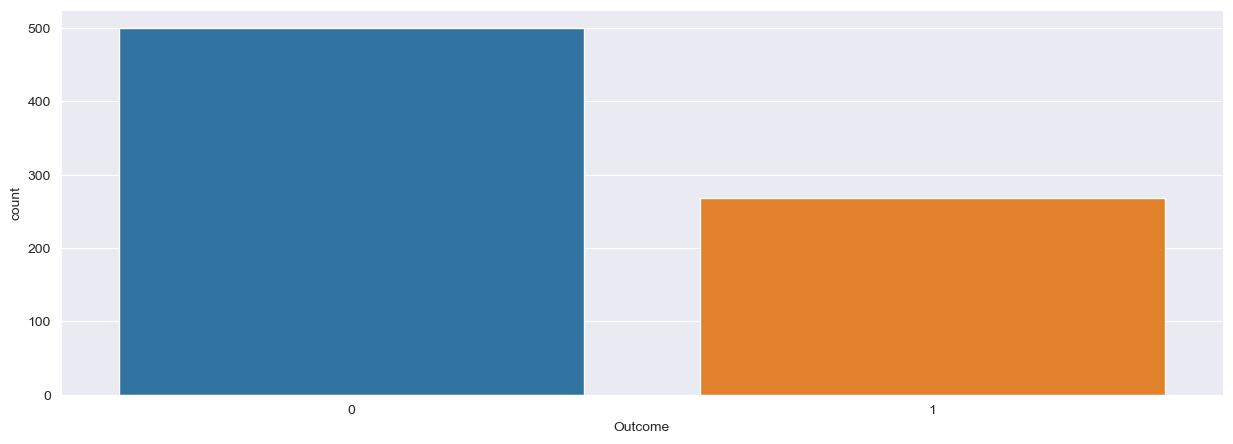

In [21]:
sns.countplot(x=diabetes_df_copy['Outcome'])
plt.show()

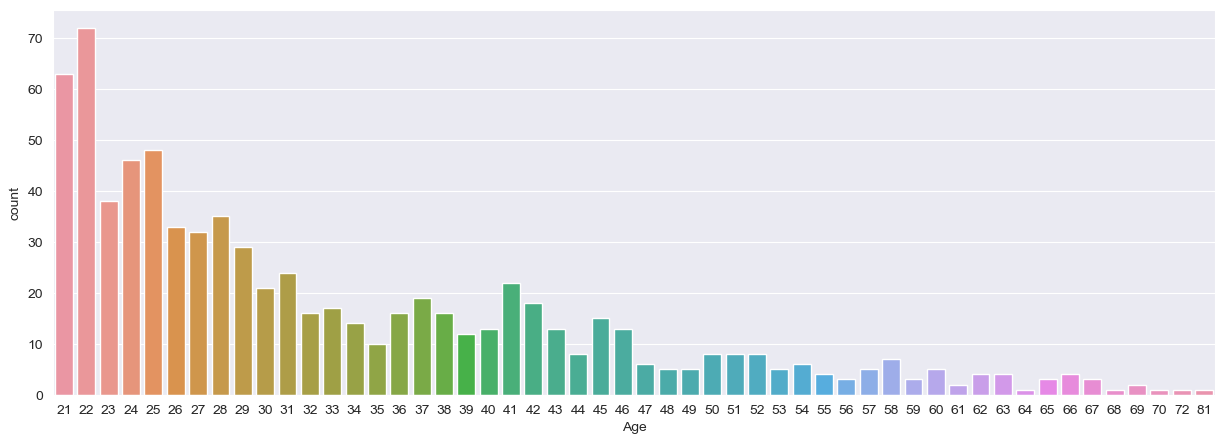

In [22]:
sns.countplot(x=diabetes_df_copy['Age'])
plt.show()

In [27]:
#creates our model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will

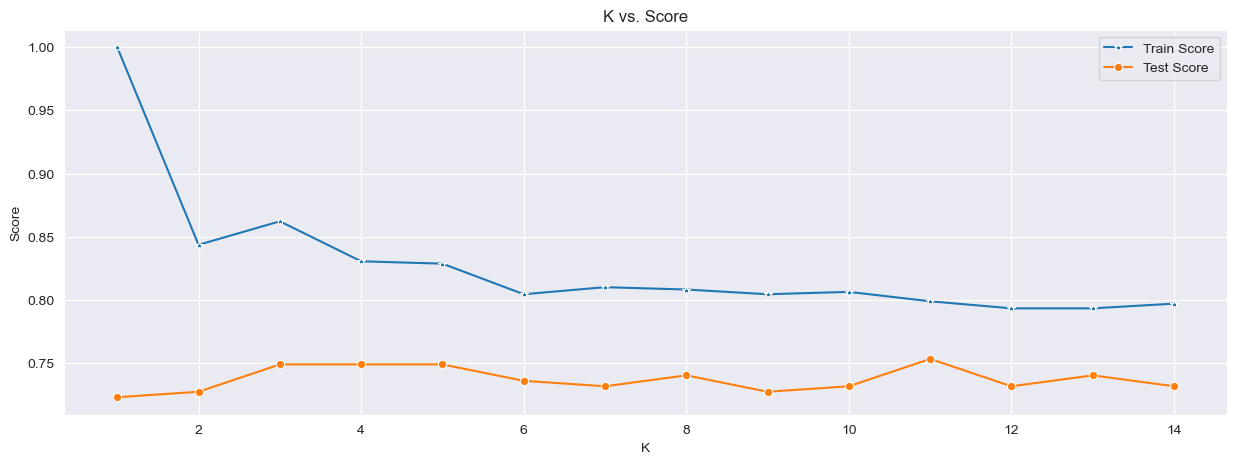

In [29]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

In [30]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7532467532467533

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]


/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
#we will implement knn using the adult dataset
crypto_df = pd.read_csv('crypto.csv')
crypto_df.head()

Type      Date     Open     High       Low     Close  Adj Close  \
0  Tether USD  1/1/2018  1.01255  1.01536  1.001530  1.007280   1.007280   
1  Tether USD  1/2/2018  1.00574  1.00988  0.993250  1.004900   1.004900   
2  Tether USD  1/3/2018  1.00660  1.02328  1.002640  1.013440   1.013440   
3  Tether USD  1/4/2018  1.01320  1.01618  0.993822  1.002530   1.002530   
4  Tether USD  1/5/2018  1.00175  1.00501  0.985915  0.998634   0.998634   

         Volume  
0  1.685300e+09  
1  2.635860e+09  
2  2.471690e+09  
3  3.200130e+09  
4  3.096620e+09

In [36]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19774 entries, 0 to 19773
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Type       19774 non-null  object 
 1   Date       19774 non-null  object 
 2   Open       19772 non-null  float64
 3   High       19772 non-null  float64
 4   Low        19772 non-null  float64
 5   Close      19772 non-null  float64
 6   Adj Close  19772 non-null  float64
 7   Volume     19772 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [37]:
crypto_df.describe()

Open          High           Low         Close     Adj Close  \
count  19772.000000  19772.000000  19772.000000  19772.000000  19772.000000   
mean    2008.620978   2058.988085   1951.445422   2008.527097   2008.527097   
std     7815.585155   8012.914625   7589.346874   7814.360399   7814.360399   
min        0.001540      0.001612      0.001247      0.001537      0.001537   
25%        0.267351      0.277035      0.256446      0.266330      0.266330   
50%        1.189555      1.200321      1.181467      1.189328      1.189328   
75%      112.577722    116.367683    107.868156    112.482011    112.482011   
max    67549.734380  68789.625000  66382.062500  67566.828130  67566.828130   

             Volume  
count  1.977200e+04  
mean   8.495771e+09  
std    1.897170e+10  
min    0.000000e+00  
25%    1.537364e+08  
50%    1.196646e+09  
75%    5.499856e+09  
max    3.510000e+11

In [39]:
#we replace all 0 or missing values with undefined
crypto_df_copy = crypto_df.copy(deep=True)
crypto_df_copy['High'] = crypto_df_copy['High'].replace(0,np.NaN)
crypto_df_copy['Low'] = crypto_df_copy['Low'].replace(0,np.NaN)
crypto_df_copy['Close'] = crypto_df_copy['Close'].replace(0,np.NaN)
crypto_df_copy['Adj Close'] = crypto_df_copy['Adj Close'].replace(0,np.NaN)
crypto_df_copy['Volume'] = crypto_df_copy['Volume'].replace(0,np.NaN)

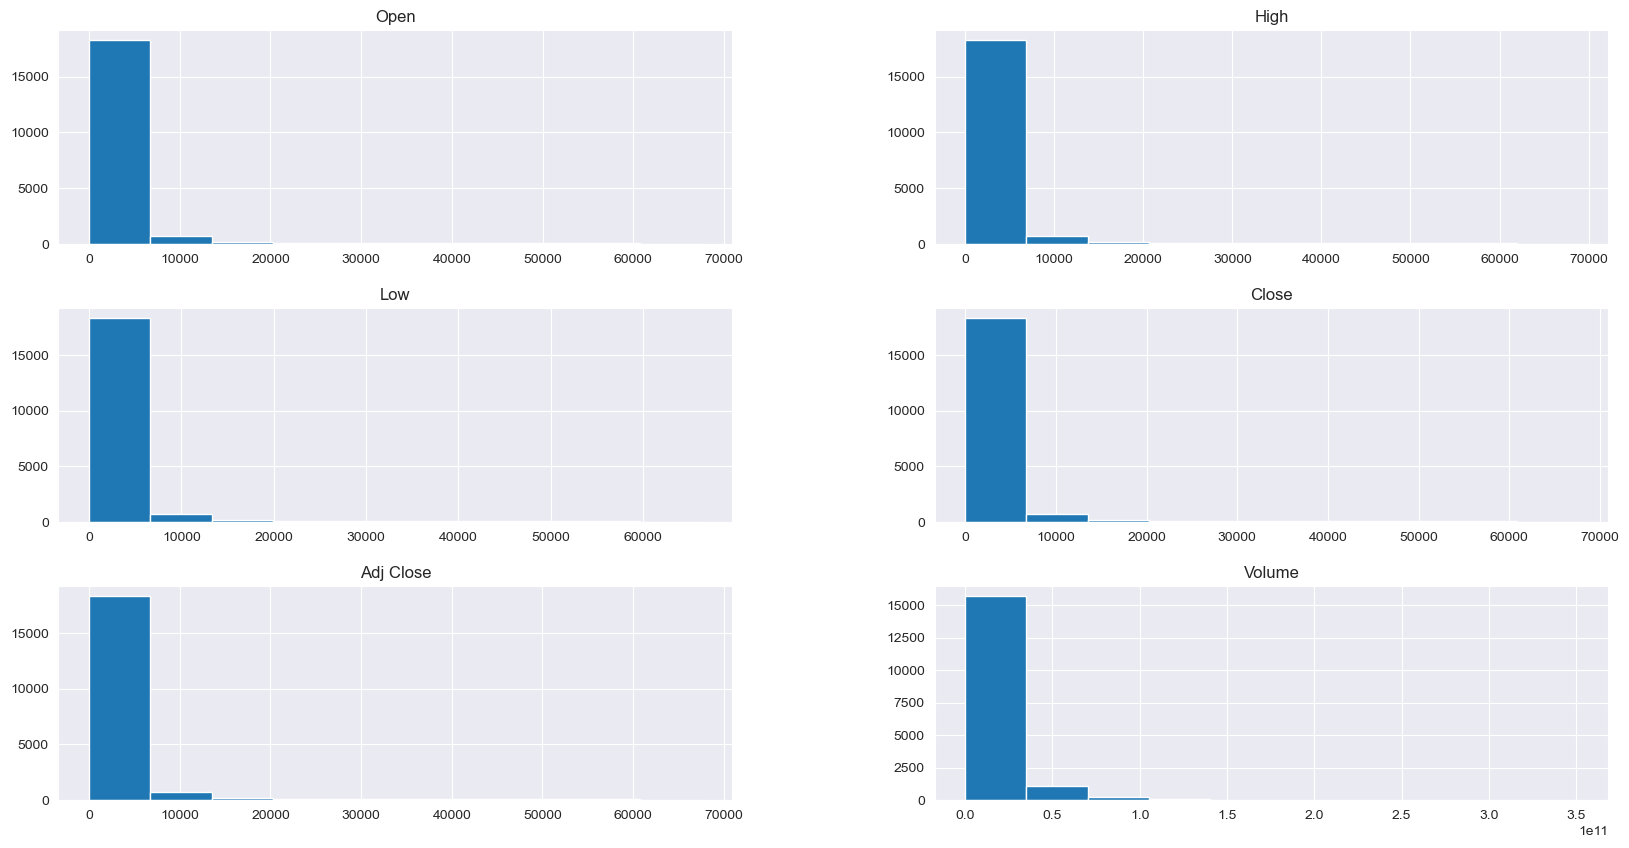

In [40]:
#creates a histogram for all the column attributes 
crypto_df_copy[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].hist(figsize = (20,10))
plt.show()

In [41]:
#since all the attributes have a distribution skewed to the left, it will be more appropiate to replace all the missing 
#values with the median instead of the mean
crypto_df_copy['Open'].fillna(crypto_df_copy['Open'].mean(), inplace = True)
crypto_df_copy['Low'].fillna(crypto_df_copy['Low'].mean(), inplace = True)
crypto_df_copy['High'].fillna(crypto_df_copy['High'].median(), inplace = True)
crypto_df_copy['Close'].fillna(crypto_df_copy['Close'].median(), inplace = True)
crypto_df_copy['Adj Close'].fillna(crypto_df_copy['Adj Close'].median(), inplace = True)
crypto_df_copy['Volume'].fillna(crypto_df_copy['Volume'].median(), inplace = True)

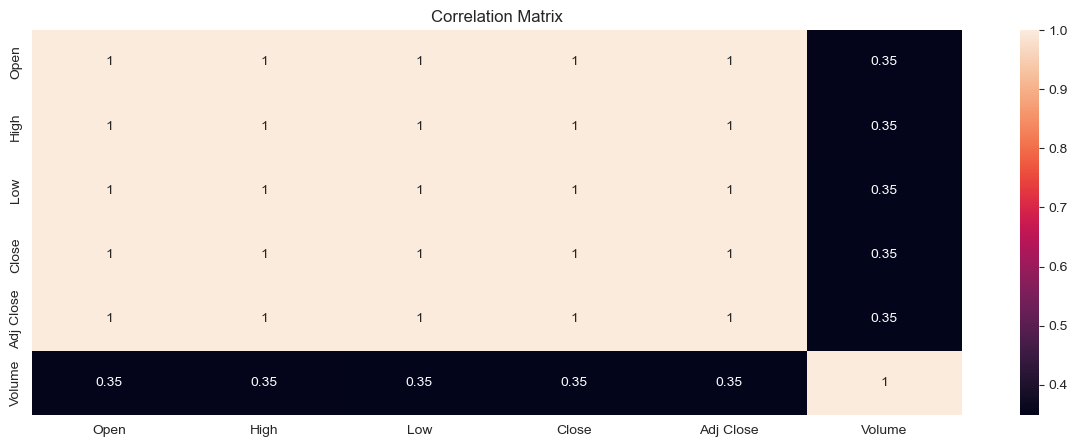

In [42]:
#we can see that there is a very strong correlation between all variables except volume
#this is a case of multicollinearity
#we will implement a Knn test on this data to see if anything interesitng happens
sns.heatmap(crypto_df_copy.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

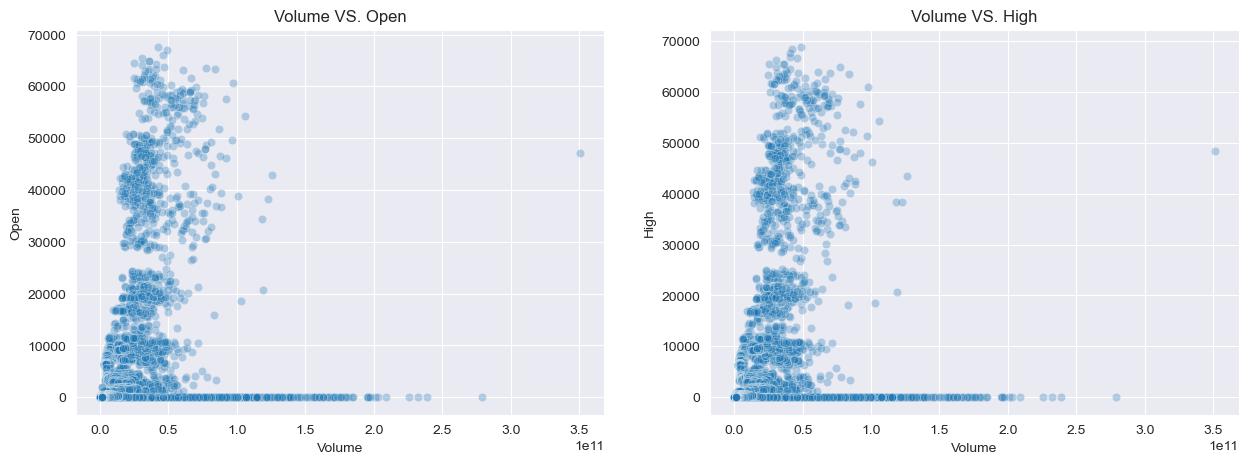

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# alpha parameter adjusts the point transparency. points with much more overlap will appear darker.
sns.scatterplot(x='Volume', y='Open', data=crypto_df_copy, alpha=0.3, ax=axes[0])
axes[0].set_title('Volume VS. Open')

sns.scatterplot(x='Volume', y='High', data=crypto_df_copy, alpha=0.3, ax=axes[1])
axes[1].set_title('Volume VS. High')

plt.show()

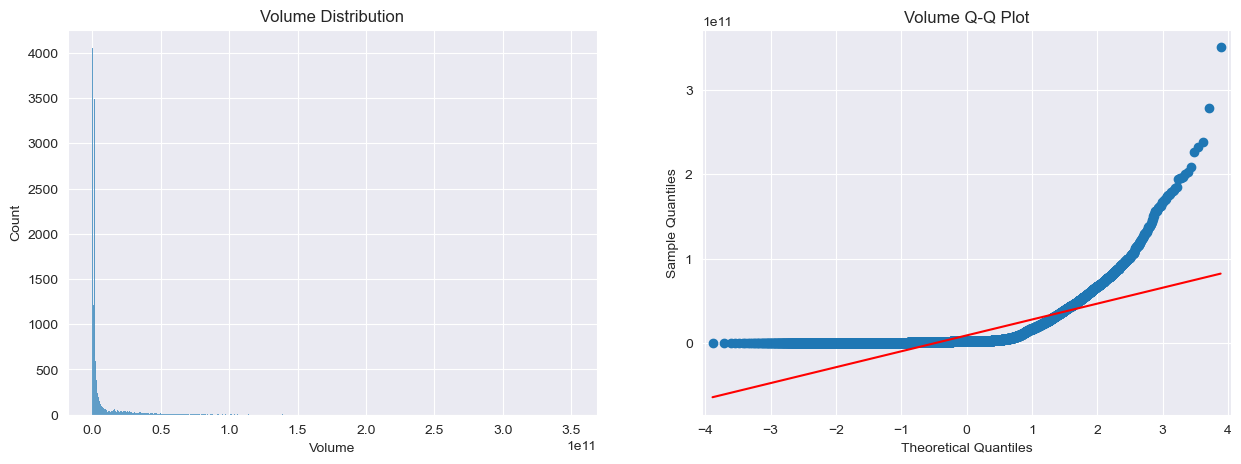

Shapiro-Wilk: 
w:0.4917721748352051, p-value:0.0

Kolmogorov-Smirnov: 
d:0.4917721748352051, p-value:0.0

Skewness of the data: 
4.345945717905238



/Users/josephjophy/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
#the pvalues suggests that we reject the null hypothesis 
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(crypto_df_copy['Volume'], ax=axes[0])
axes[0].set_title('Volume Distribution')

sm.qqplot(crypto_df_copy['Volume'], line='s', ax=axes[1])
axes[1].set_title('Volume Q-Q Plot')

pylab.show()

w, p_val = scipy.stats.shapiro(crypto_df_copy['Volume'])
print('Shapiro-Wilk: \nw:{}, p-value:{}\n'.format(w,p_val))

d, p_val = scipy.stats.kstest(crypto_df_copy['Volume'], 'norm')
print('Kolmogorov-Smirnov: \nd:{}, p-value:{}\n'.format(w,p_val))

print('Skewness of the data: \n{}\n'.format(scipy.stats.skew(crypto_df_copy['Volume'])))

In [62]:
#we drop type and date since they are not number values
from sklearn.preprocessing import StandardScaler

# all columns except 'Volume'
X = crypto_df_copy.drop(['Type', 'Date'], axis=1)
y = crypto_df_copy['Low']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data=X_scaled, columns=X.columns)

In [63]:
X.head()

Open      High       Low     Close  Adj Close    Volume
0 -0.256892 -0.256825 -0.257017 -0.256894  -0.256894 -0.372656
1 -0.256893 -0.256825 -0.257018 -0.256894  -0.256894 -0.322303
2 -0.256893 -0.256824 -0.257017 -0.256893  -0.256893 -0.331000
3 -0.256892 -0.256825 -0.257018 -0.256895  -0.256895 -0.292413
4 -0.256893 -0.256826 -0.257019 -0.256895  -0.256895 -0.297896

In [ ]:
sns.countplot(x=crypto_df_copy['Low'])
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.